In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
import numpy as np

##Descriptors

In [ ]:
file_path = '/content/drive/MyDrive/descriptors-final.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,Molecule ChEMBL ID,Smiles,Standard value in uM,Activity,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL3939922,O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc([C@@H]4CCCO4)cc3...,0.04779,1,12.223446,12.223446,0.278825,-3.547548,0.701275,36.208333,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3894523,CC(C)(CO)c1ccc(-c2cc3c(C(=O)O)c[nH]c3cc2Cl)cc1,0.00710,1,12.258169,12.258169,0.235833,-3.978798,0.654580,24.041667,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4113341,O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc(O[C@@H]4CCC[C@H]...,0.10620,1,12.265593,12.265593,0.255569,-3.875673,0.631129,40.961538,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3980024,CS(=O)(=O)N1CCC(c2ccc(-c3cc4c(C(=O)O)c[nH]c4cc...,0.41230,1,12.911463,12.911463,0.205264,-6.130015,0.671062,36.107143,...,0,1,0,0,0,0,0,0,0,0
4,CHEMBL3899409,O=C(O)c1n[nH]c2cc(Cl)c(-c3ccc(CO)cc3)cc12,0.17460,1,11.913373,11.913373,0.329256,-2.992226,0.693732,18.809524,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65606,CHEMBL95692,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCNCC2)n1,3.16228,1,14.488511,14.488511,0.125595,-4.092415,0.780834,36.500000,...,0,0,0,0,0,0,0,0,0,0
65607,CHEMBL200229,CN(C)C1CCN(C(=O)c2ccc(Nc3nccc(-c4cc5ccccc5s4)n...,0.04000,1,14.169189,14.169189,0.007998,-4.548157,0.442478,34.333333,...,0,0,0,0,0,0,0,1,0,0
65608,CHEMBL2312303,O=C(NCCCN1CCCC1=O)c1cnc(NCc2cc(Cl)ccc2Cl)nc1NC...,30.00000,0,14.220362,14.220362,0.536147,-4.724452,0.411792,42.058824,...,0,0,0,0,0,0,0,0,0,0
65609,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,1.99526,1,12.948260,12.948260,0.071909,-3.232573,0.532981,23.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Activity','Molecule ChEMBL ID', 'Smiles','Standard value in uM'])
y = df['Activity']

In [ ]:
X_new = X

In [ ]:
X_new

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.223446,12.223446,0.278825,-3.547548,0.701275,36.208333,341.794,325.666,341.081871,122,...,0,0,0,0,0,0,0,0,0,0
1,12.258169,12.258169,0.235833,-3.978798,0.654580,24.041667,343.810,325.666,343.097521,124,...,0,0,0,0,0,0,0,0,0,0
2,12.265593,12.265593,0.255569,-3.875673,0.631129,40.961538,371.820,353.676,371.092436,134,...,0,0,0,0,0,0,0,0,0,0
3,12.911463,12.911463,0.205264,-6.130015,0.671062,36.107143,418.902,399.750,418.075406,146,...,0,1,0,0,0,0,0,0,0,0
4,11.913373,11.913373,0.329256,-2.992226,0.693732,18.809524,302.717,291.629,302.045820,106,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65606,14.488511,14.488511,0.125595,-4.092415,0.780834,36.500000,353.401,333.241,353.165188,134,...,0,0,0,0,0,0,0,0,0,0
65607,14.169189,14.169189,0.007998,-4.548157,0.442478,34.333333,457.603,430.387,457.193631,168,...,0,0,0,0,0,0,0,1,0,0
65608,14.220362,14.220362,0.536147,-4.724452,0.411792,42.058824,505.450,475.210,504.180730,182,...,0,0,0,0,0,0,0,0,0,0
65609,12.948260,12.948260,0.071909,-3.232573,0.532981,23.000000,293.282,282.194,293.080041,108,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Max:", np.max(X))
print("Min:", np.min(X))
print("Mean:", np.mean(X))
print("Std:", np.std(X))
print("Shape:", X.shape)
print("Contains NaN:", np.isnan(X).any())
print("Contains Inf:", np.isinf(X).any())

Max: 1.008008466447356e+270
Min: -320.6432558944717
Mean: 7.232451435149358e+262
Std: MaxAbsEStateIndex    2.039316
MaxEStateIndex       2.039316
MinAbsEStateIndex    0.278634
MinEStateIndex       1.208516
qed                  0.184154
                       ...   
fr_thiazole          0.237998
fr_thiocyan          0.003906
fr_thiophene         0.260712
fr_unbrch_alkane     0.000000
fr_urea              0.310296
Length: 217, dtype: float64
Shape: (65558, 217)
Contains NaN: MaxAbsEStateIndex    False
MaxEStateIndex       False
MinAbsEStateIndex    False
MinEStateIndex       False
qed                  False
                     ...  
fr_thiazole          False
fr_thiocyan          False
fr_thiophene         False
fr_unbrch_alkane     False
fr_urea              False
Length: 217, dtype: bool
Contains Inf: MaxAbsEStateIndex    False
MaxEStateIndex       False
MinAbsEStateIndex    False
MinEStateIndex       False
qed                  False
                     ...  
fr_thiazole          Fal

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
for i in range(X.shape[1]):
    col = X.iloc[:, i]
    if np.max(np.abs(col)) > 1e10:
        print(f"Column {i}: max={np.max(col)}, mean={np.mean(col)}, std={np.std(col)}")


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Column 42: max=1.008008466447356e+270, mean=1.5694419614274107e+265, std=inf


In [ ]:
X = np.delete(X, [42], axis=1)

In [ ]:
for i in range(X.shape[1]):
    col = X[:, i]
    if np.max(np.abs(col)) > 1e10:
        print(f"Column {i}: max={np.max(col)}, mean={np.mean(col)}, std={np.std(col)}")

In [ ]:
X.shape

(65558, 216)

In [ ]:
y

,Activity
0,1
1,1
2,1
3,1
4,1
...,...
65606,1
65607,1
65608,0
65609,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[1.17839815e+01, 1.17839815e+01, 3.08044218e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.75558726e+00, 8.75558726e+00, 2.62914905e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32468189e+01, 1.32468189e+01, 1.27138356e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.37778322e+01, 1.37778322e+01, 2.78873337e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36629371e+01, 1.36629371e+01, 2.45376258e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46143666e+01, 1.46143666e+01, 2.36371777e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
        layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', name='penultimate_layer'),
        layers.Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7999 - loss: 0.4769 - val_accuracy: 0.8202 - val_loss: 0.4225
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8212 - loss: 0.4095 - val_accuracy: 0.8338 - val_loss: 0.3908
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8342 - loss: 0.3861 - val_accuracy: 0.8434 - val_loss: 0.3655
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8438 - loss: 0.3632 - val_accuracy: 0.8456 - val_loss: 0.3607
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8496 - loss: 0.3569 - val_accuracy: 0.8525 - val_loss: 0.3517
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8589 - loss: 0.3382 - val_accuracy: 0.8563 - val_loss: 0.3492
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8603 - loss: 0.3315 - val_accuracy: 0.8586 - val_loss: 0.3350
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8622 - loss: 0.3267 -

1639/1639 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


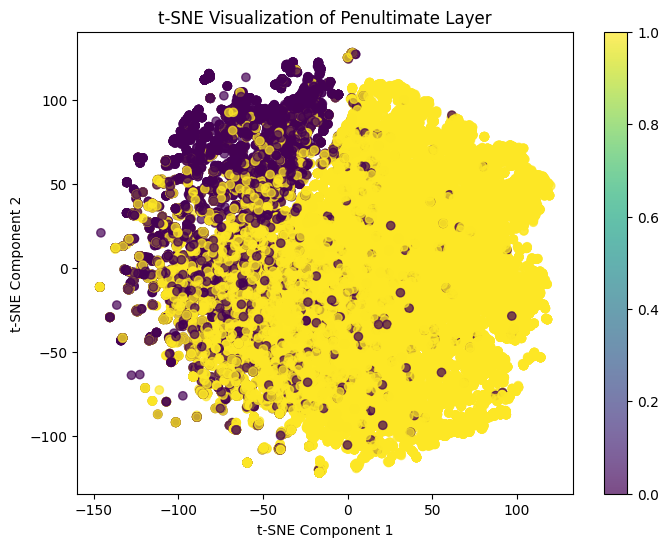

In [ ]:
from sklearn.manifold import TSNE

model.build((None, X_train_scaled.shape[1]))

penultimate_model = keras.Model(inputs=model.layers[0].input, outputs=model.get_layer('penultimate_layer').output)
penultimate_output = penultimate_model.predict(X_train_scaled)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(penultimate_output)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=Y_train, cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization of Penultimate Layer")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter)
plt.show()


In [ ]:
Y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 27.0307
Test Accuracy: 81.19%


In [ ]:
print(f'Neural Network Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

Neural Network Accuracy: 0.8853
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67      2466
           1       0.91      0.95      0.93     10646

    accuracy                           0.89     13112
   macro avg       0.82      0.78      0.80     13112
weighted avg       0.88      0.89      0.88     13112



In [ ]:
pip install shap

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [ ]:
feature_names = X_new.columns

In [ ]:
X_new = X_new.drop(X_new.columns[42], axis=1)


In [ ]:
X_new.shape

(65558, 216)

In [ ]:
X_train_scaled.shape

(52446, 216)

In [ ]:
feature_names = feature_names[:X_train_scaled.shape[1]]
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)


In [ ]:
explainer = shap.Explainer(model, X_train_scaled_df)

shap_values = explainer(X_train_scaled_df)

PermutationExplainer explainer: 52447it [1:52:55,  7.74it/s]


###Summary Plot

<ipython-input-34-fdb1a77d47d3>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_scaled_df)


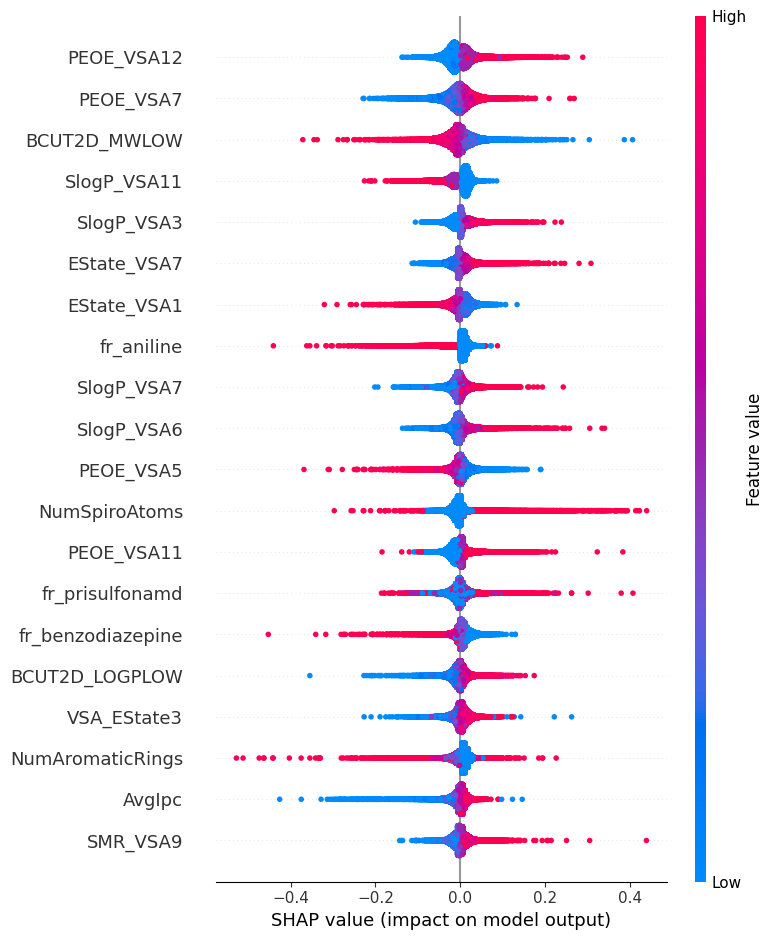

In [ ]:
shap.summary_plot(shap_values, X_train_scaled_df)

###Dependence Plot

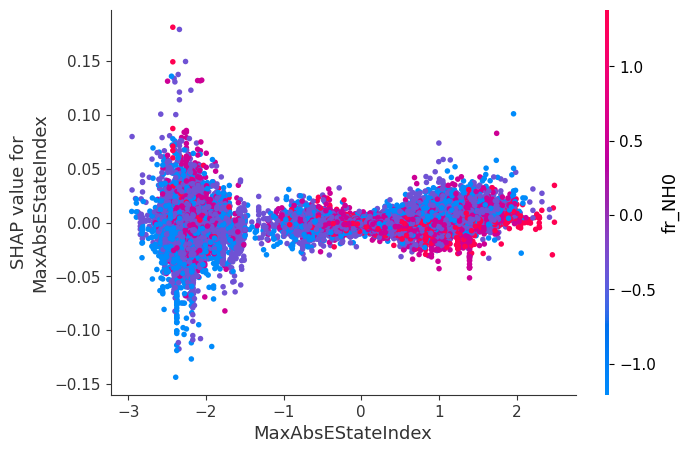

In [ ]:
shap.dependence_plot(0, shap_values.values, X_train_scaled_df)

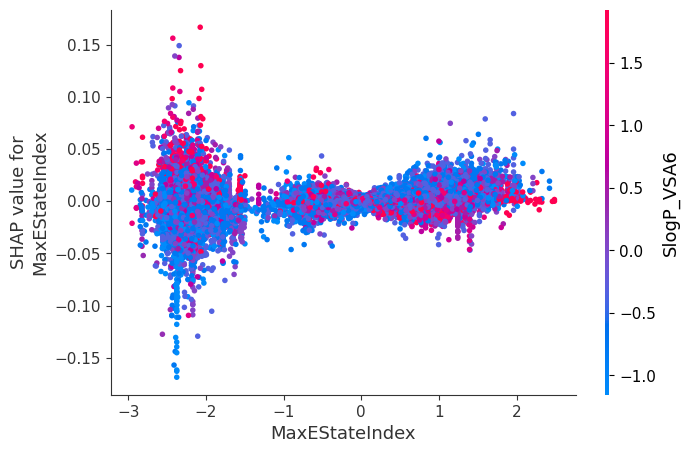

In [ ]:
shap.dependence_plot(1, shap_values.values, X_train_scaled_df)

###Decision Plot

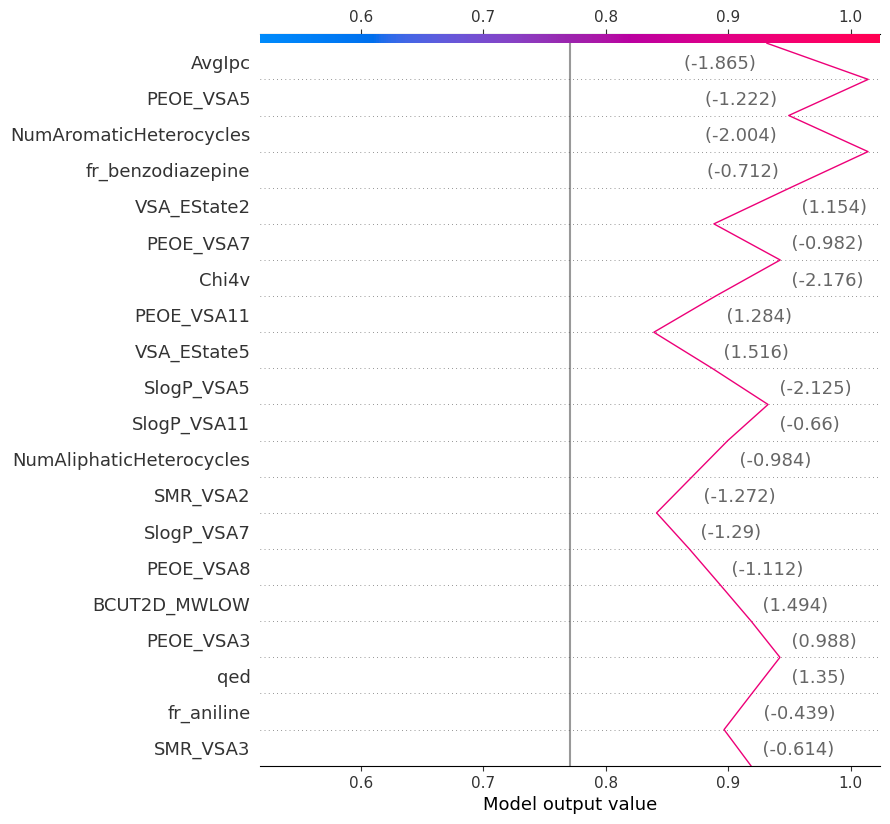

In [ ]:
import matplotlib.pyplot as plt

shap.decision_plot(
    shap_values.base_values[0],
    shap_values.values[0],
    X_train_scaled_df.iloc[0, :]
)

plt.show()

###Waterfall

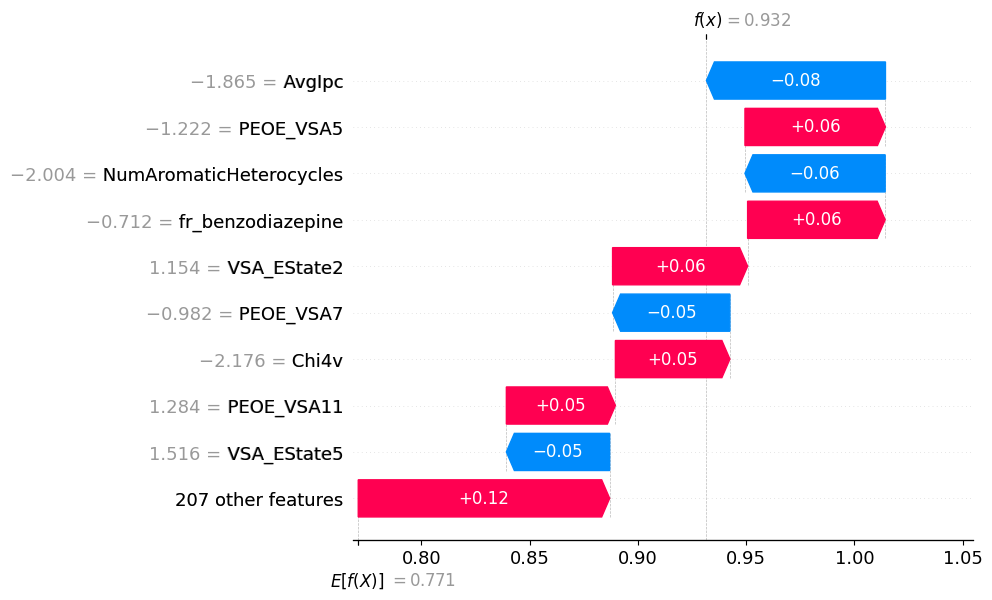

In [ ]:
shap.plots.waterfall(shap_values[0])


### Bar Summary Plot (Feature Importance Only)

<ipython-input-55-dcc0ab9b524f>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_scaled_df, plot_type="bar")


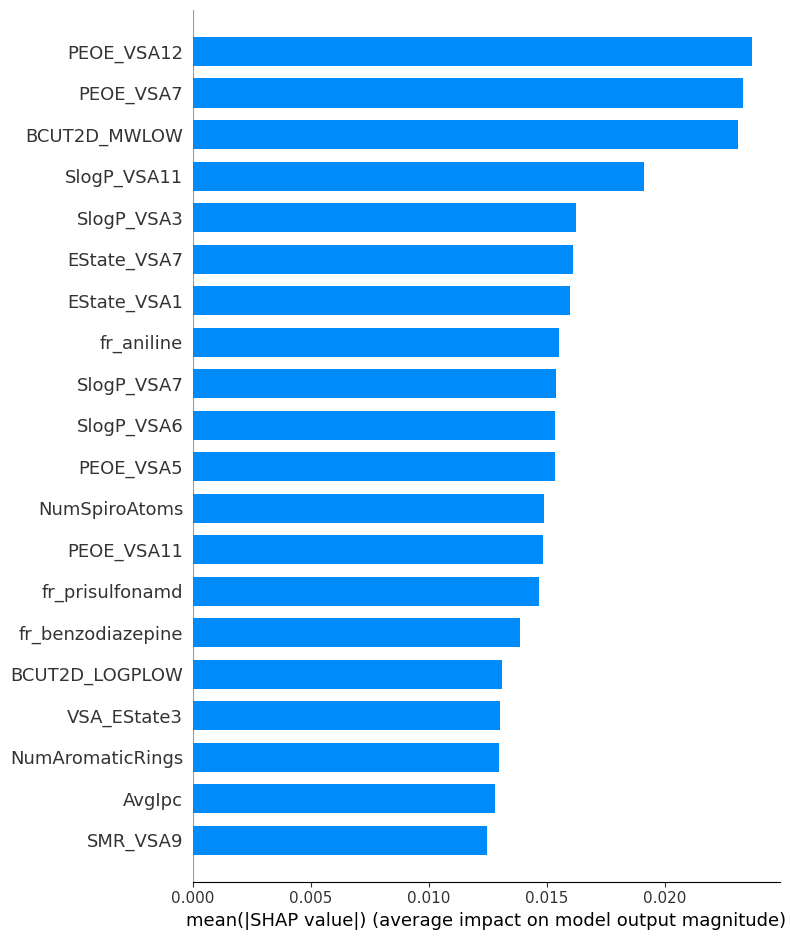

In [ ]:
shap.summary_plot(shap_values, X_train_scaled_df, plot_type="bar")
